#              Descriptive Statistics of a real-estate company

## Getting familiar with dataset

CRIM - per capita crime rate by town

·      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

·      INDUS - proportion of non-retail business acres per town.

·      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

·      NOX - nitric oxides concentration (parts per 10 million)

·      RM - average number of rooms per dwelling

·      AGE - proportion of owner-occupied units built prior to 1940

·      DIS - weighted distances to five Boston employment centres

·      RAD - index of accessibility to radial highways

·      TAX - full-value property-tax rate per $10,000

·      PTRATIO - pupil-teacher ratio by town

·      LSTAT - % lower status of the population

·      MEDV - Median value of owner-occupied homes in $1000's

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
df=pd.read_csv(boston_url) # we use an API to get the data from IBM

In [3]:
df.tail(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
496,496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,21.14,19.7
497,497,0.26838,0.0,9.69,0.0,0.585,5.794,70.6,2.8927,6.0,391.0,19.2,14.10,18.3
498,498,0.23912,0.0,9.69,0.0,0.585,6.019,65.3,2.4091,6.0,391.0,19.2,12.92,21.2
499,499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,15.10,17.5
500,500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,14.33,16.8
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0
505,505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,7.88,11.9


In [4]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [11]:
df.shape

(506, 14)

In [5]:
df.isna().count()

Unnamed: 0    506
CRIM          506
ZN            506
INDUS         506
CHAS          506
NOX           506
RM            506
AGE           506
DIS           506
RAD           506
TAX           506
PTRATIO       506
LSTAT         506
MEDV          506
dtype: int64

In [6]:
#checking the variation and its average distriution of crime rate in boston
df.CRIM.std()

8.601545105332487

In [7]:
df.CRIM.mean()

3.613523557312254

## Is there a significant difference in the median value of houses bounded by the Charles river or not?

(array([471.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  35.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

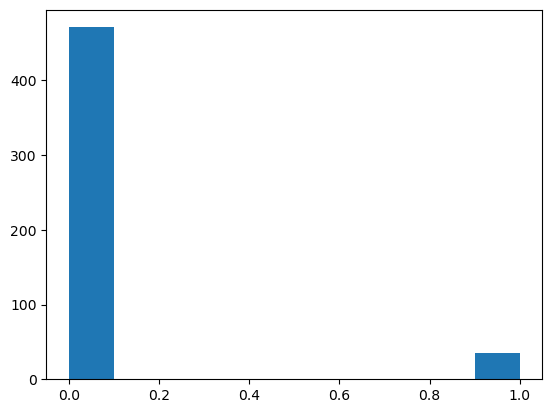

In [8]:
plt.hist(df.CHAS)

there is a huge significant value of houses that are bound to the Charles River and those who are not bound to the Charles River, the houses not bound represent a big number approximately 470 houses and those bound around 30 houses
let's check the exact value below.


In [9]:
b=df[df.CHAS==1].agg({'CHAS':'count'})
nb=df[df.CHAS==0].agg({'CHAS':'count'})
print('bound to the river',b)
print('not bound to the river',nb)

bound to the river CHAS    35
dtype: int64
not bound to the river CHAS    471
dtype: int64


Hence, 471 houses are not bound to the river and 35 are bound to the river in the Boston area

## Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

to check the difference between the median values of houses of each proportion of owner-occupied units built before 1940, we need to compare the values of these variables based on the central tendency of the data, hence the mean, the standard deviation and the variance.

Text(0.5, 1.0, 'AGE-MEDV')

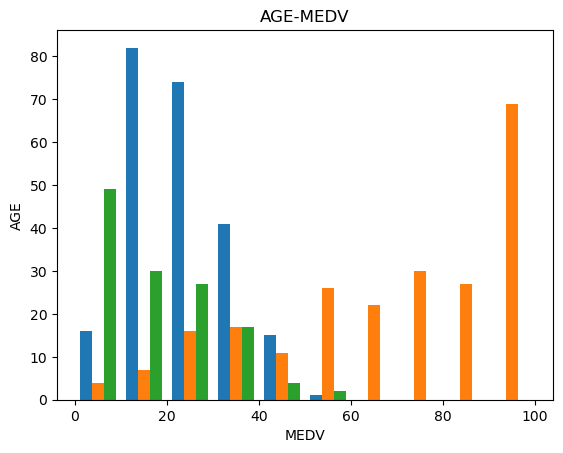

In [45]:
dif=df.groupby('MEDV').agg({'AGE':['mean','std']}).reset_index()
plt.hist(dif)
plt.xlabel('MEDV')
plt.ylabel('AGE')
plt.title('AGE-MEDV')

the conclusion is that the median value of owner-occupied houses differ from the proportion of owner-occupied units built prior to 1940 by their means and standard deviations.

## Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?



TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

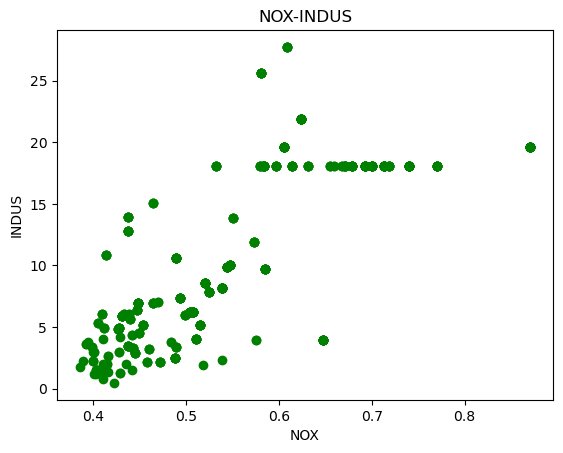

In [74]:
# let's use scatter plot to check the correlation between Nitric Oxide and the proportion of non-retail business acres per town
x=df['NOX']
Y=df['INDUS']
plt.title('NOX-INDUS')
plt.xlabel('NOX')
plt.ylabel('INDUS')
plt.scatter(x,Y, color='green')
# using pearson's coefficient and the the P-value to determine correlation between the two varibales.
scipy.stats.pearsonr(df['NOX'],df['INDUS'])

looking at the persons score and the scatter plot, we will conclude that there is a strong positive correltion between the proportion of non-retail business acres and the Nitric Oxide concentration, as the the proportion of non-retail business increses, the concentration of Nitric Oxides increases as well in the area.
therefore, there is a relationship between the two variables.

we can use also regressions to try to get coefficients of the two variables that relate to each other.

## What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?

In [96]:
X=np.asanyarray(df[['DIS']])
Y=np.asanyarray(df[['MEDV']])
model=LinearRegression()
weight=model.fit(X,Y)
print('coefficient:',model.coef_)
print('Intercept:',model.intercept_)

coefficient: [[1.09161302]]
Intercept: [18.39008833]


therefore, our function will be as f(MEDV)=18.4 +1.1DIS, therefore an additional weighted distance to the five Boston employment centres will result in increase of number of the median value of owner-occupied homes.  

#### by Efrayim M.